In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# load data
data  = pd.read_csv('archive/Sleep_health_and_lifestyle_dataset.csv')

In [6]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [8]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [9]:
del data['Person ID']

In [10]:
# number of attack labels 
data['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

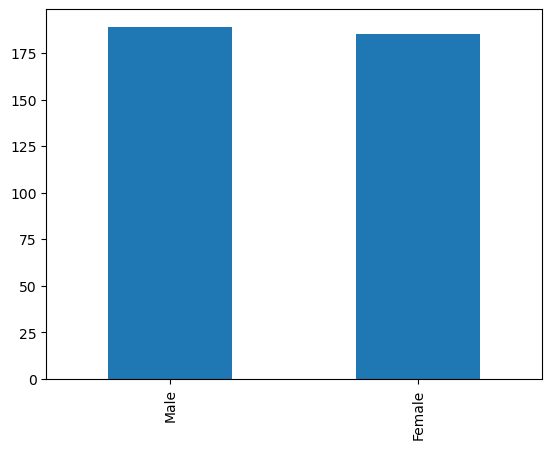

In [11]:
data.Gender.value_counts().plot(kind='bar');

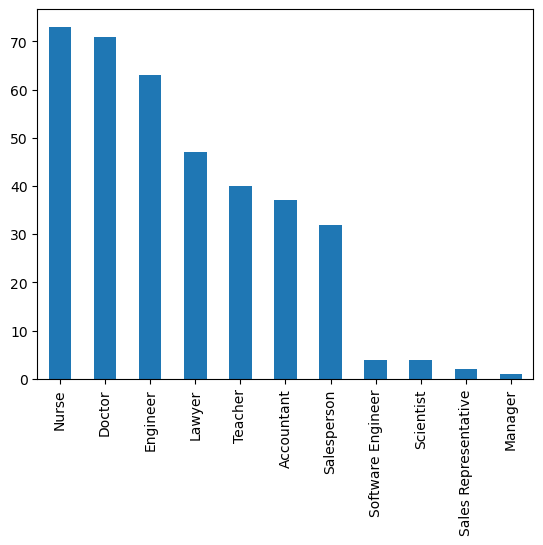

In [12]:
data.Occupation.value_counts().plot(kind='bar');

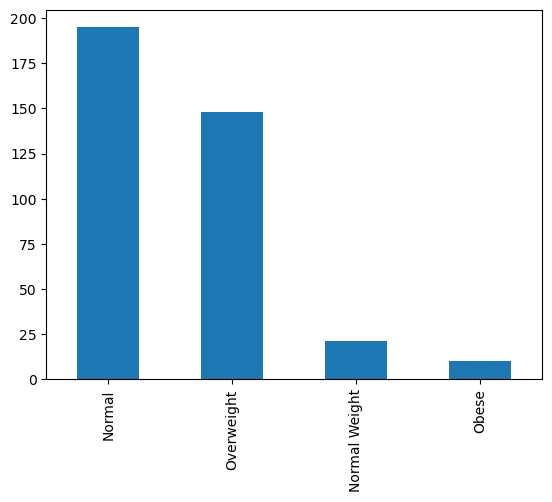

In [13]:
data['BMI Category'].value_counts().plot(kind='bar');

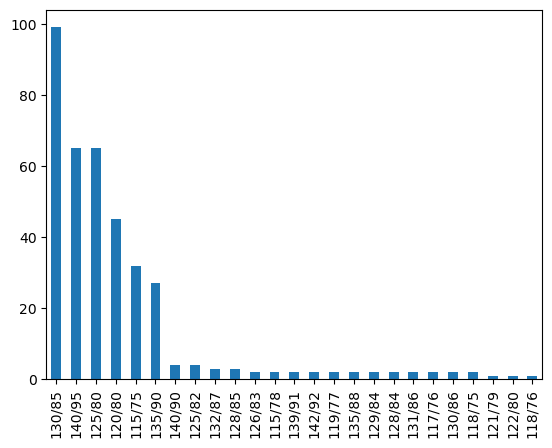

In [14]:
data['Blood Pressure'].value_counts().plot(kind='bar');

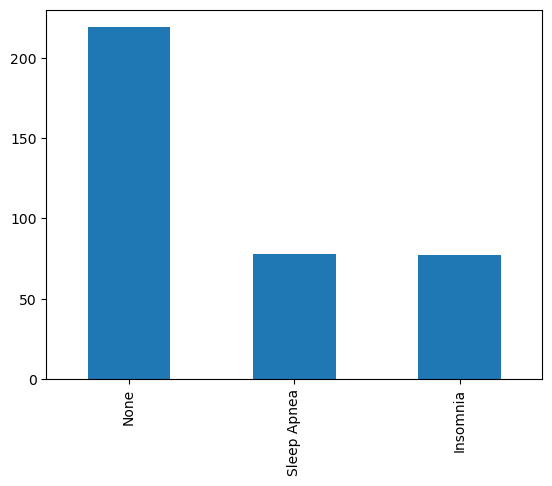

In [15]:
data['Sleep Disorder'].value_counts().plot(kind='bar');

In [16]:
data['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

In [17]:
data['Blood Pressure'].value_counts()

130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
115/78     2
139/91     2
142/92     2
119/77     2
135/88     2
129/84     2
128/84     2
131/86     2
117/76     2
130/86     2
118/75     2
121/79     1
122/80     1
118/76     1
Name: Blood Pressure, dtype: int64

In [18]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['Gender']= label_encoder.fit_transform(data['Gender'])
data['Occupation']= label_encoder.fit_transform(data['Occupation'])
data['BMI Category']= label_encoder.fit_transform(data['BMI Category'])
data['Blood Pressure']= label_encoder.fit_transform(data['Blood Pressure'])
data['Sleep Disorder']= label_encoder.fit_transform(data['Sleep Disorder'])

In [19]:
X = data.drop(["Sleep Disorder"],axis =1)
y = data["Sleep Disorder"]

In [20]:
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

In [66]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# SVM

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
svm = SVC(probability=True)

param_grid = {'C': [0.1, 1, 10],  
              'gamma': [0.001, 0.01,0.1], 
              'kernel': ['rbf']} 

grid = GridSearchCV(svm, param_grid, refit = True, verbose = 3) 
grid.fit(x_train, y_train)

y_pred    = grid.predict(x_valid)

svm_acc = accuracy_score(y_pred, y_valid)
svm_prec = precision_score(y_pred, y_valid,average='weighted')
svm_rec = recall_score(y_pred, y_valid,average='weighted')
svm_f1 = f1_score(y_pred, y_valid,average='weighted')

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.850 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.800 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.917 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.850 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.881 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.800 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.933 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.833 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.847 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;,

In [67]:
storeResults('Support Vector Machine',svm_acc,svm_prec,svm_rec,svm_f1)

# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
# fit the model 
clf.fit(x_train, y_train)

y_pred    = clf.predict(x_valid)

knn_acc = accuracy_score(y_pred, y_valid)
knn_prec = precision_score(y_pred, y_valid,average='weighted')
knn_rec = recall_score(y_pred, y_valid,average='weighted')
knn_f1 = f1_score(y_pred, y_valid,average='weighted')

In [68]:
storeResults('KNN',knn_acc,knn_prec,knn_rec,knn_f1)

# Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4,min_samples_split=3)
# fit the model 
clf.fit(x_train, y_train)

y_pred    = clf.predict(x_valid)

dt_acc = accuracy_score(y_pred, y_valid)
dt_prec = precision_score(y_pred, y_valid,average='weighted')
dt_rec = recall_score(y_pred, y_valid,average='weighted')
dt_f1 = f1_score(y_pred, y_valid,average='weighted')

In [69]:
storeResults('DecisionTree',dt_acc,dt_prec,dt_rec,dt_f1)

# Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=9,min_samples_split=6)

clf.fit(x_train, y_train)

y_pred    = clf.predict(x_valid)

rf_acc = accuracy_score(y_pred, y_valid)
rf_prec = precision_score(y_pred, y_valid,average='weighted')
rf_rec = recall_score(y_pred, y_valid,average='weighted')
rf_f1 = f1_score(y_pred, y_valid,average='weighted')

In [70]:
storeResults('Random Forest',rf_acc,rf_prec,rf_rec,rf_f1)

# ANN-MLP

In [48]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1)
param_grid = {'hidden_layer_sizes': [i for i in range(2,5)],
              'solver': ['sgd'],
              'learning_rate': ['adaptive'],
              'max_iter': [1000]
              }
clf = GridSearchCV(mlp, param_grid=param_grid, verbose=False)
clf.fit(x_train, y_train)

y_pred    = clf.predict(x_valid)

mlp_acc = accuracy_score(y_pred, y_valid)
mlp_prec = precision_score(y_pred, y_valid,average='weighted')
mlp_rec = recall_score(y_pred, y_valid,average='weighted')
mlp_f1 = f1_score(y_pred, y_valid,average='weighted')

In [71]:
storeResults('ANN-MLP',mlp_acc,mlp_prec,mlp_rec,mlp_f1)

# Voting Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = BaggingClassifier(RandomForestClassifier(),n_estimators=10, random_state=0)
clf2 = DecisionTreeClassifier(random_state=10)

eclf1 = VotingClassifier(estimators=[('bag', clf1), ('dt', clf2)], voting='soft')

eclf1.fit(x_train, y_train)

y_pred    = eclf1.predict(x_valid)

vot_acc = accuracy_score(y_pred, y_valid)
vot_prec = precision_score(y_pred, y_valid,average='weighted')
vot_rec = recall_score(y_pred, y_valid,average='weighted')
vot_f1 = f1_score(y_pred, y_valid,average='weighted')

In [73]:
storeResults('VotingClassifier',vot_acc,vot_prec,vot_rec,vot_f1)

# Comparison

In [74]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score
                        
                      }) 

In [75]:
result

,ML Model,Accuracy,Precision,Recall,F1_score
0,Support Vector Machine,0.880,0.892,0.880,0.884
1,KNN,0.867,0.883,0.867,0.867
2,DecisionTree,0.907,0.909,0.907,0.908
3,Random Forest,0.880,0.887,0.880,0.881
4,ANN-MLP,0.573,1.000,0.573,0.729
5,VotingClassifier,0.973,0.973,0.973,0.973


# Graph

In [76]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

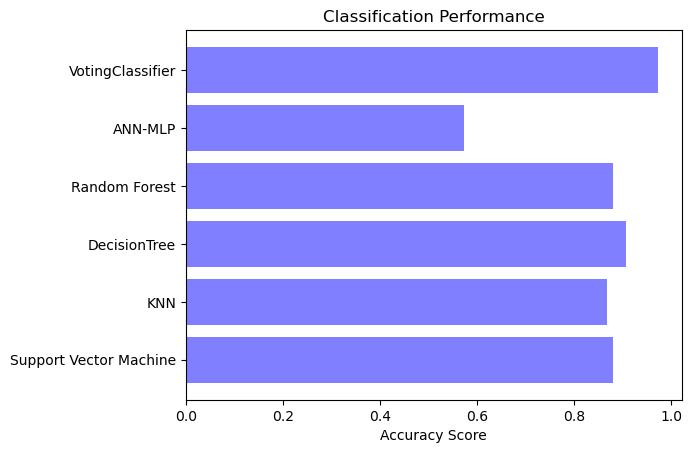

In [77]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

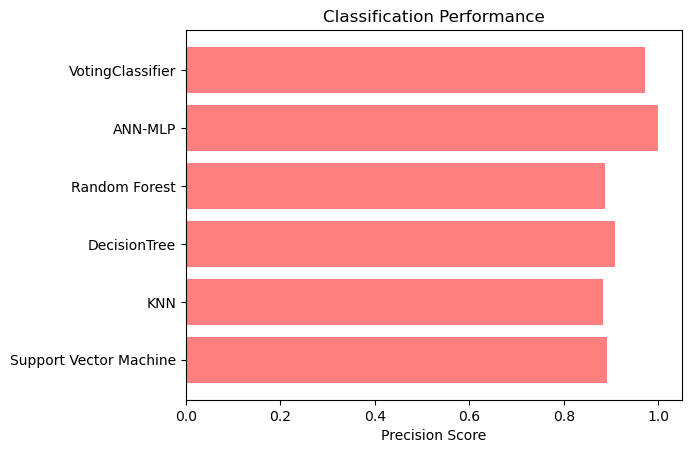

In [78]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

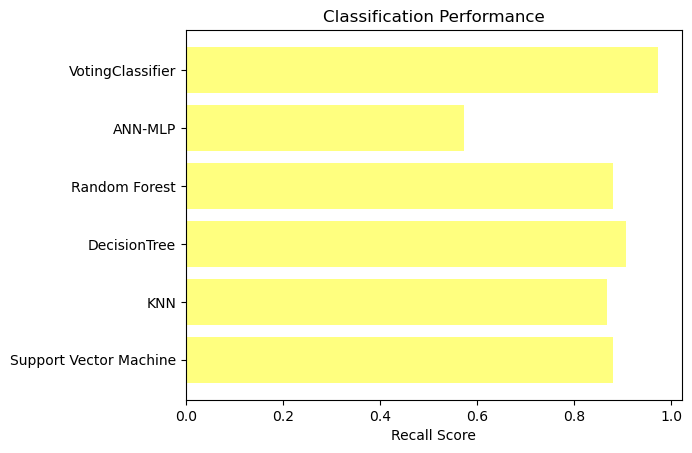

In [79]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

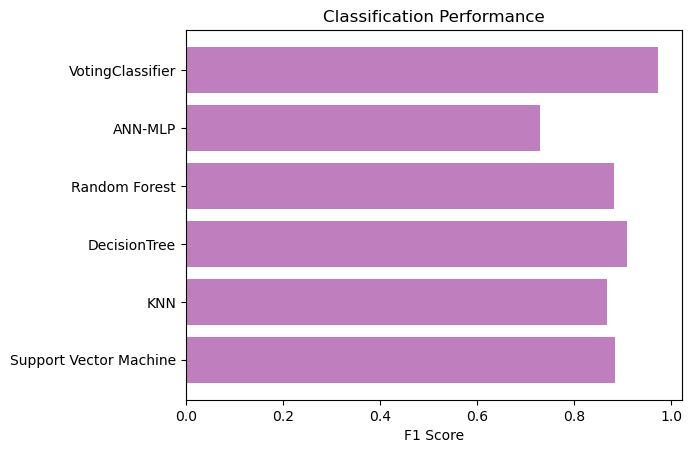

In [80]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='purple')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# Modelling

In [81]:
import joblib
filename = 'model.sav'
joblib.dump(eclf1, filename)

['model.sav']